<a href="https://colab.research.google.com/github/kimhyoryeong/ml_edu/blob/master/seaborn3~4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set(color_codes=True)


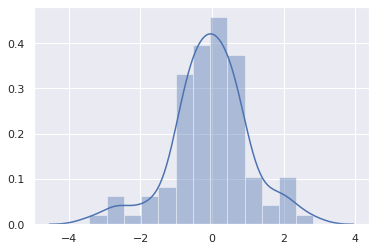

In [ ]:
x = np.random.normal(size=100)
sns.distplot(x); #데이터 밀도 곡선

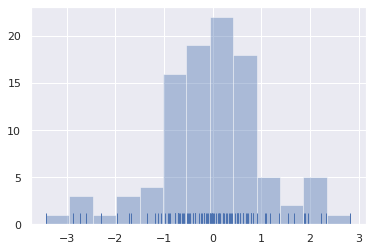

In [4]:
sns.distplot(x, kde=False, rug=True); #데이터 밀도 곡선을 아래 작은 눈금으로 표현

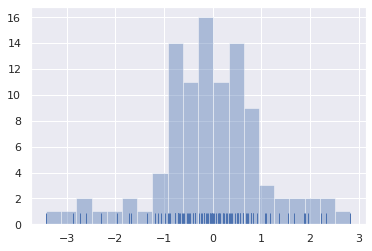

In [5]:
sns.distplot(x, bins=20, kde=False, rug=True); #막대의 폭을 줄여 다르게 표현

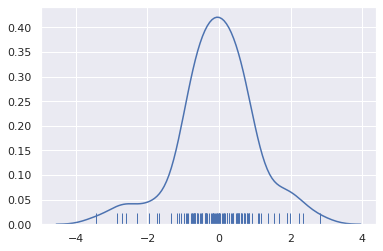

In [6]:
sns.distplot(x, hist=False, rug=True); #막대 그래프를 없애고 러그플롯(작은눈금)과 데이터 밀도 곡선으로 만 표현

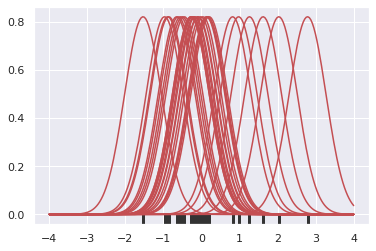

In [7]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3); #여러 곡선으로 밀도 표현

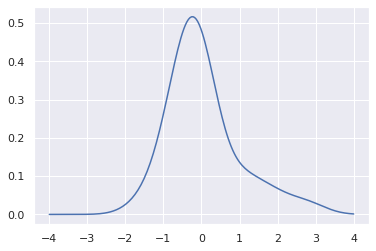

In [8]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density); #곡선을 하나의 곡선으로 합쳐 1이되도록 밀도를 표현

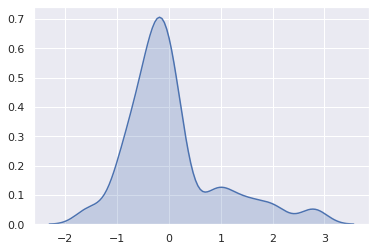

In [9]:
sns.kdeplot(x, shade=True);

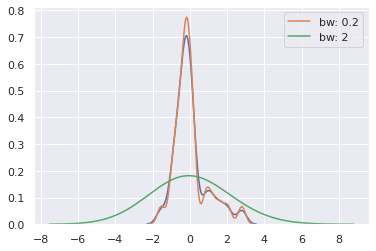

In [10]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();


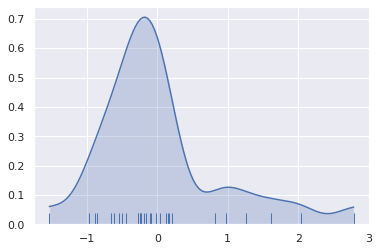

In [11]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

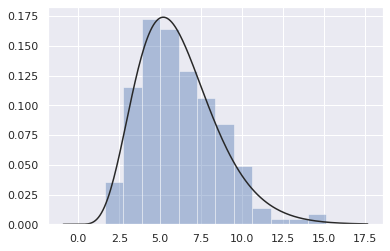

In [12]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

In [13]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

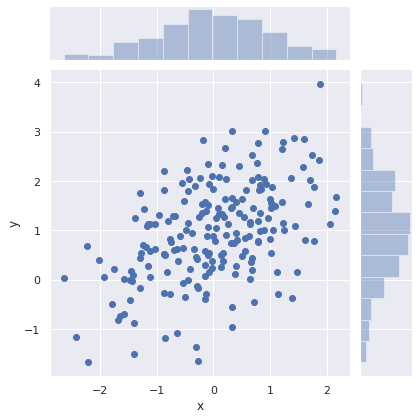

In [14]:
sns.jointplot(x="x", y="y", data=df);

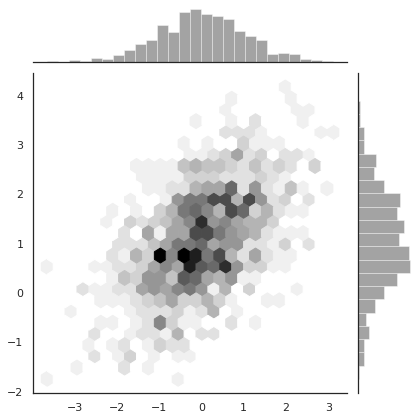

In [15]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

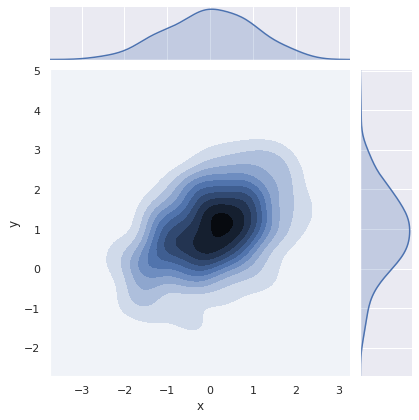

In [16]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

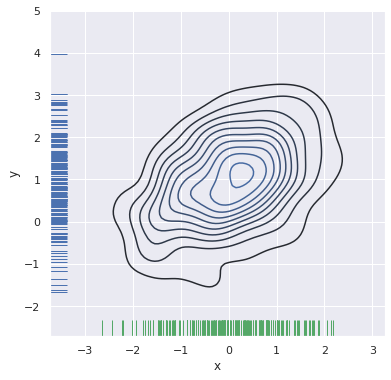

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

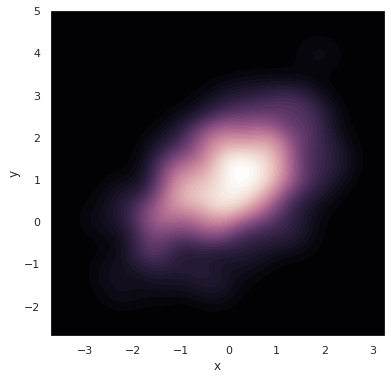

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

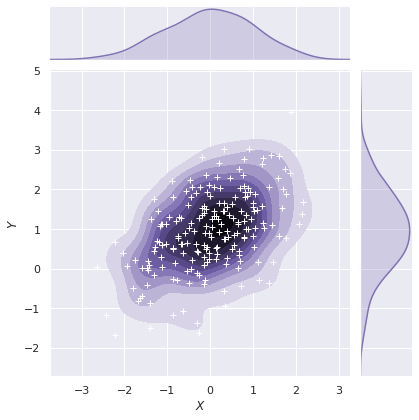

In [19]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

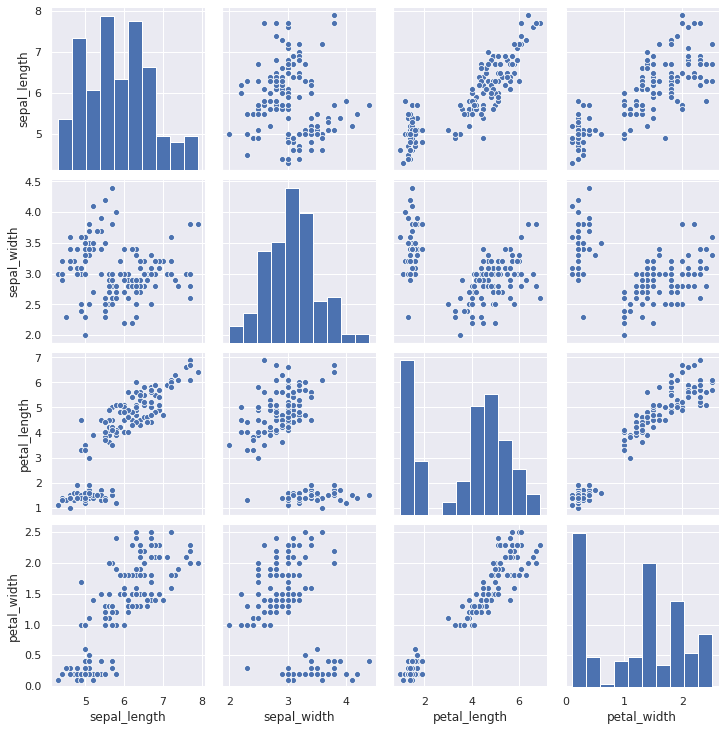

In [20]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

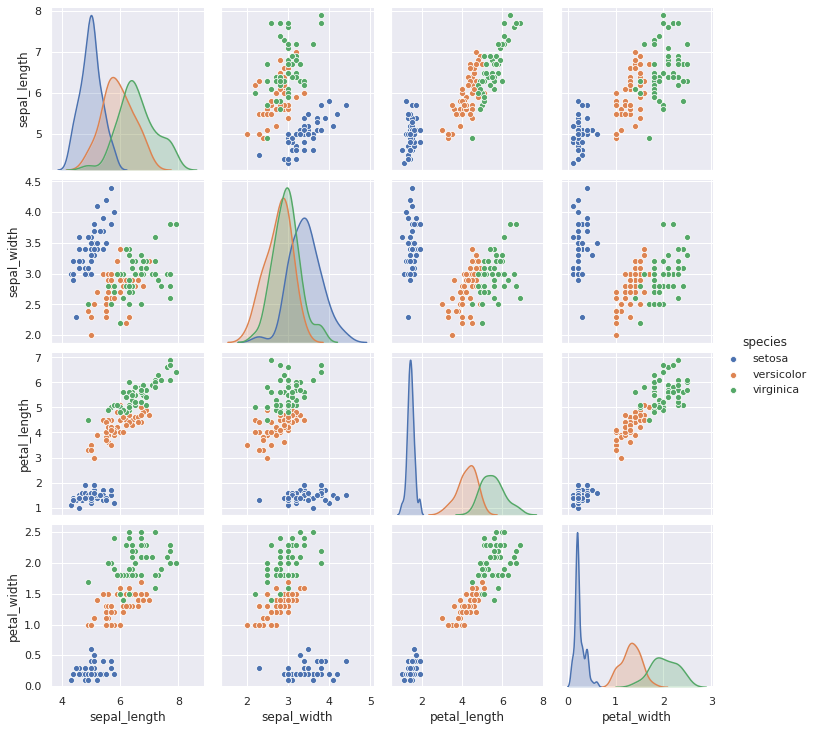

In [21]:
sns.pairplot(iris, hue="species");

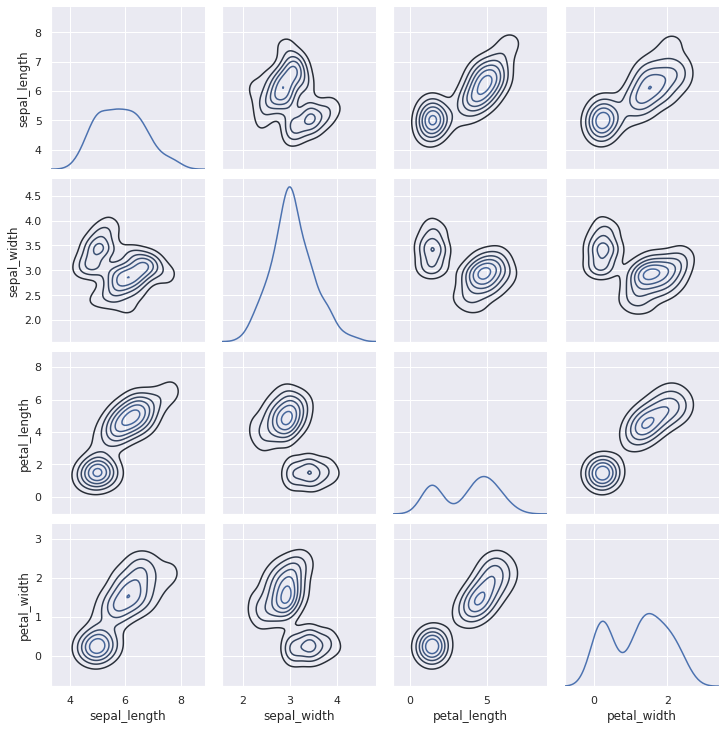

In [22]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

###선형 관계 시각화

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
sns.set(color_codes=True)

In [26]:
tips = sns.load_dataset("tips")

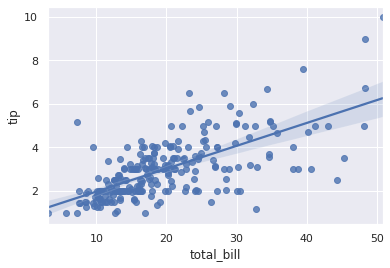

In [27]:
sns.regplot(x="total_bill", y="tip", data=tips);


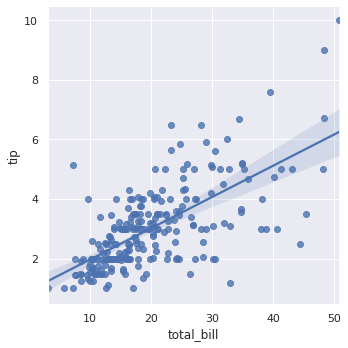

In [28]:
sns.lmplot(x="total_bill", y="tip", data=tips);

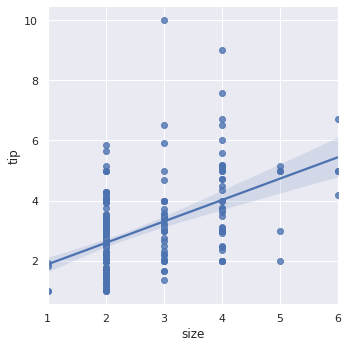

In [29]:
sns.lmplot(x="size", y="tip", data=tips);

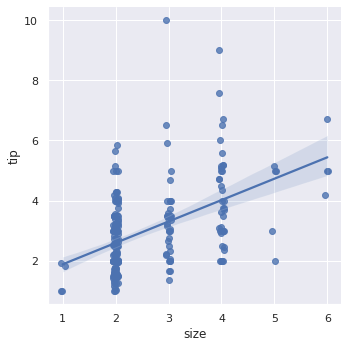

In [30]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

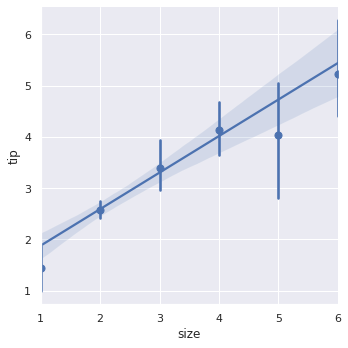

In [31]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [32]:
anscombe = sns.load_dataset("anscombe")

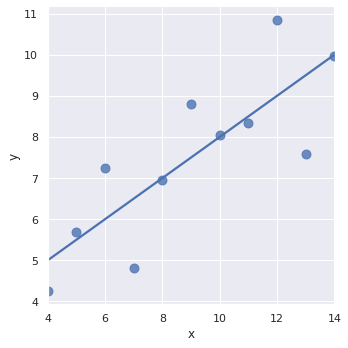

In [33]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

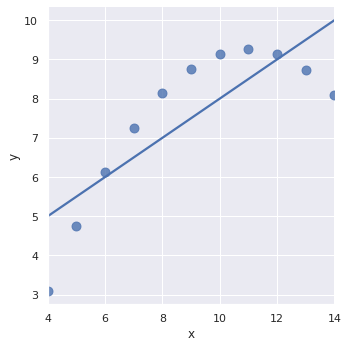

In [34]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

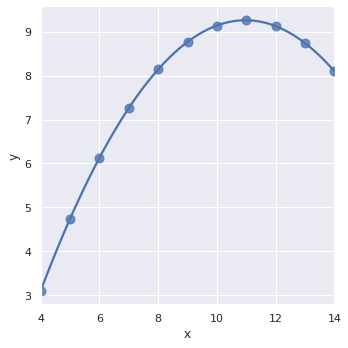

In [35]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

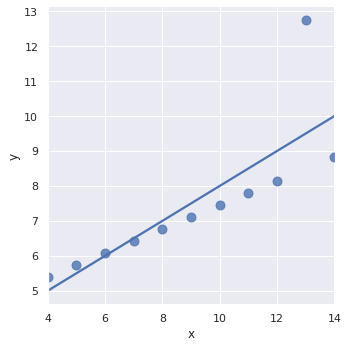

In [36]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});


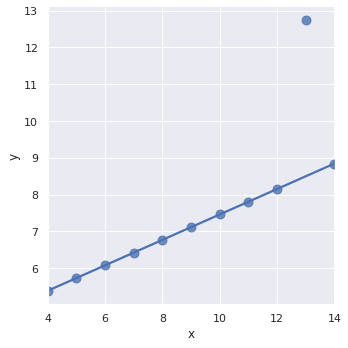

In [37]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

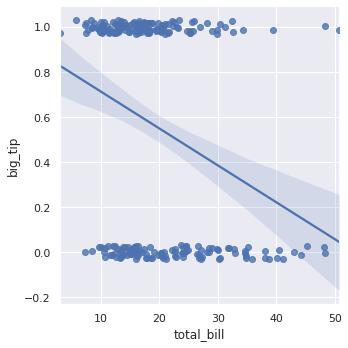

In [38]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

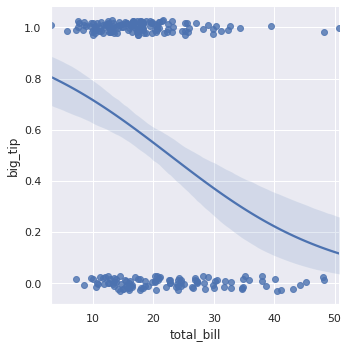

In [39]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);


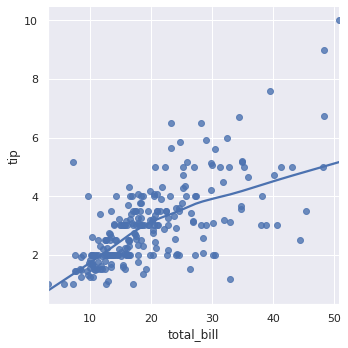

In [40]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);


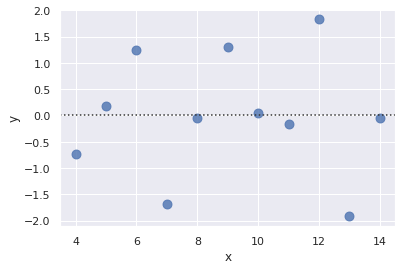

In [41]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

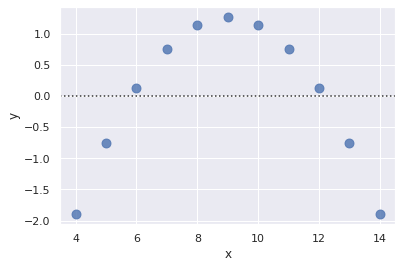

In [42]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});


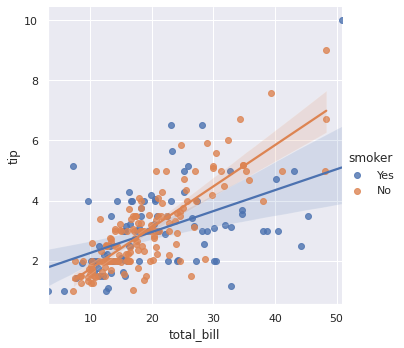

In [43]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

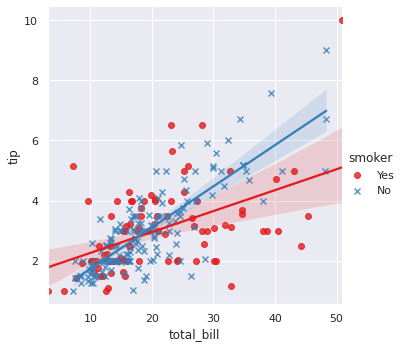

In [44]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

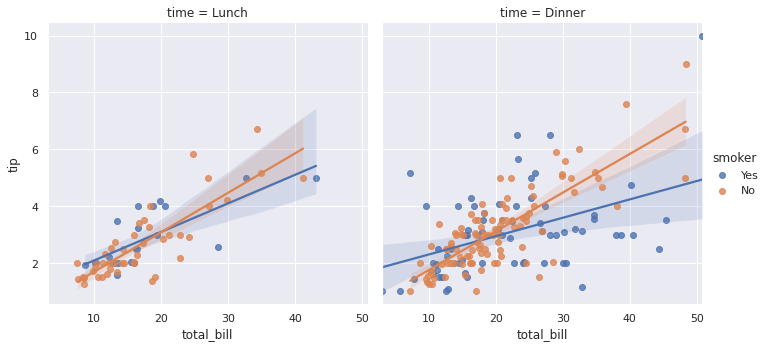

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);


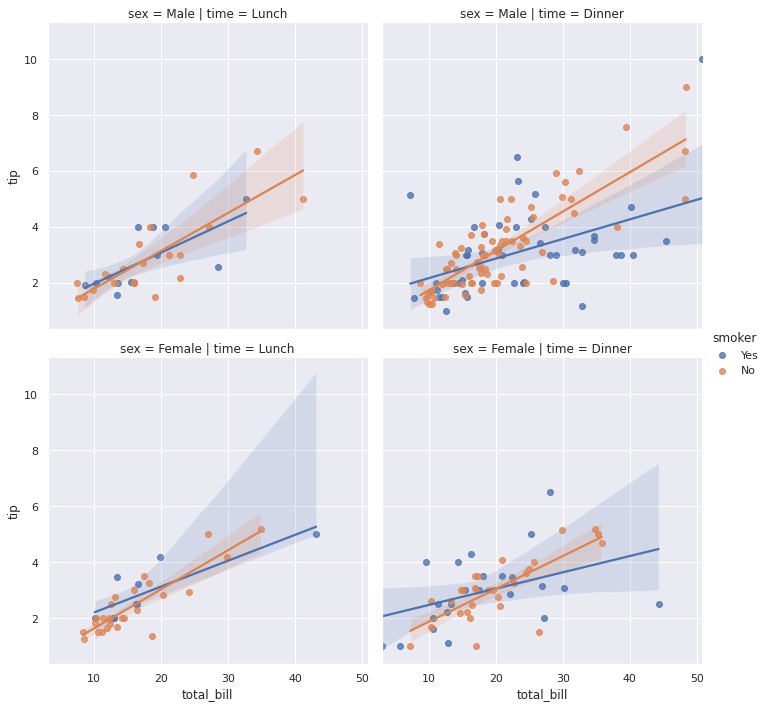

In [46]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);


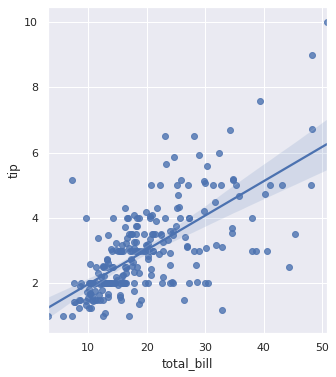

In [47]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

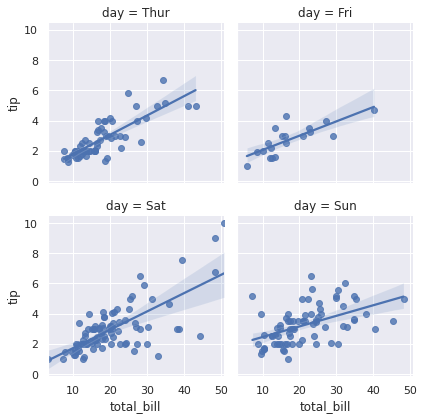

In [48]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

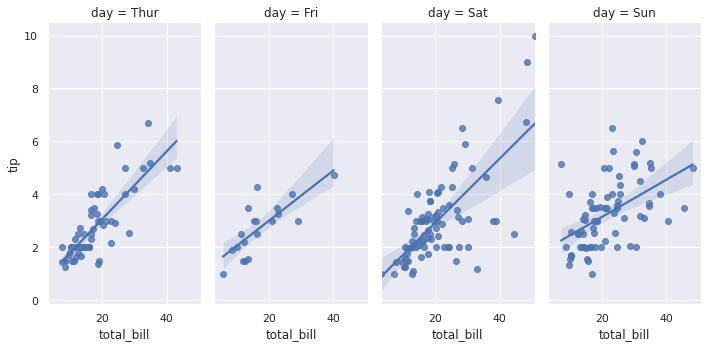

In [49]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

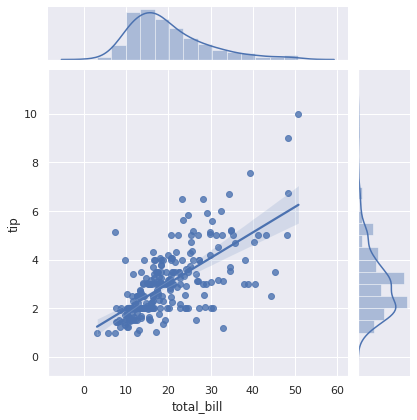

In [50]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");


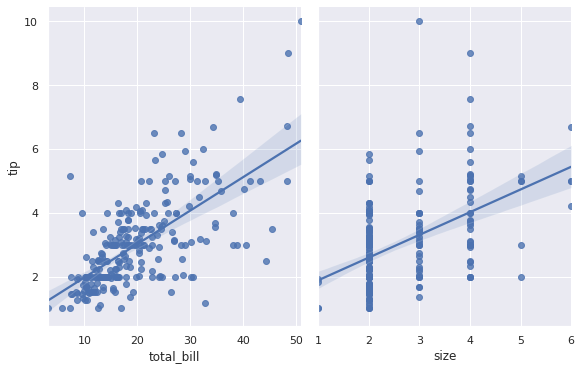

In [51]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");


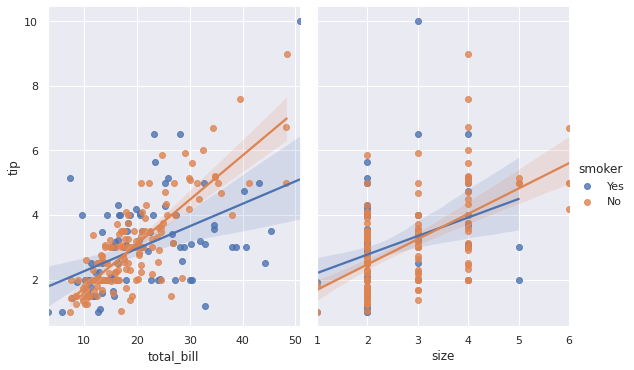

In [52]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");
